# Local Search Implementation on Diagonal Magic Cube
## Made by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from simulated import *
from hill_climb import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [2]:
goal_state = [

# Level 1
[
    [33, 22, 113, 42, 105],
    [2, 89, 106, 19, 99],
    [85, 82, 4, 119, 25],
    [98, 90, 6, 112, 9],
    [97, 32, 86, 23, 77]
],
# Level 2
[
    [95, 80, 111, 11, 18],
    [91, 55, 65, 69, 35],
    [16, 66, 70, 53, 110],
    [5, 68, 54, 67, 121],
    [108, 46, 15, 115, 31]
],
# Level 3
[
    [100, 17, 48, 34, 116],
    [114, 75, 52, 62, 12],
    [83, 50, 63, 76, 43],
    [8, 64, 74, 51, 118],
    [10, 109, 78, 92, 26]
],
# Level 4
[
    [38, 102, 3, 125, 47],
    [81, 59, 72, 58, 45],
    [30, 73, 56, 60, 96],
    [87, 57, 61, 71, 39],
    [79, 24, 123, 1, 88]
],
# Level 5
[
    [49, 94, 40, 103, 29],
    [27, 37, 20, 107, 124],
    [101, 44, 122, 7, 41],
    [117, 36, 120, 14, 28],
    [21, 104, 13, 84, 93]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [4]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 1278394.0


### Problem Cube Initialization

In [5]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

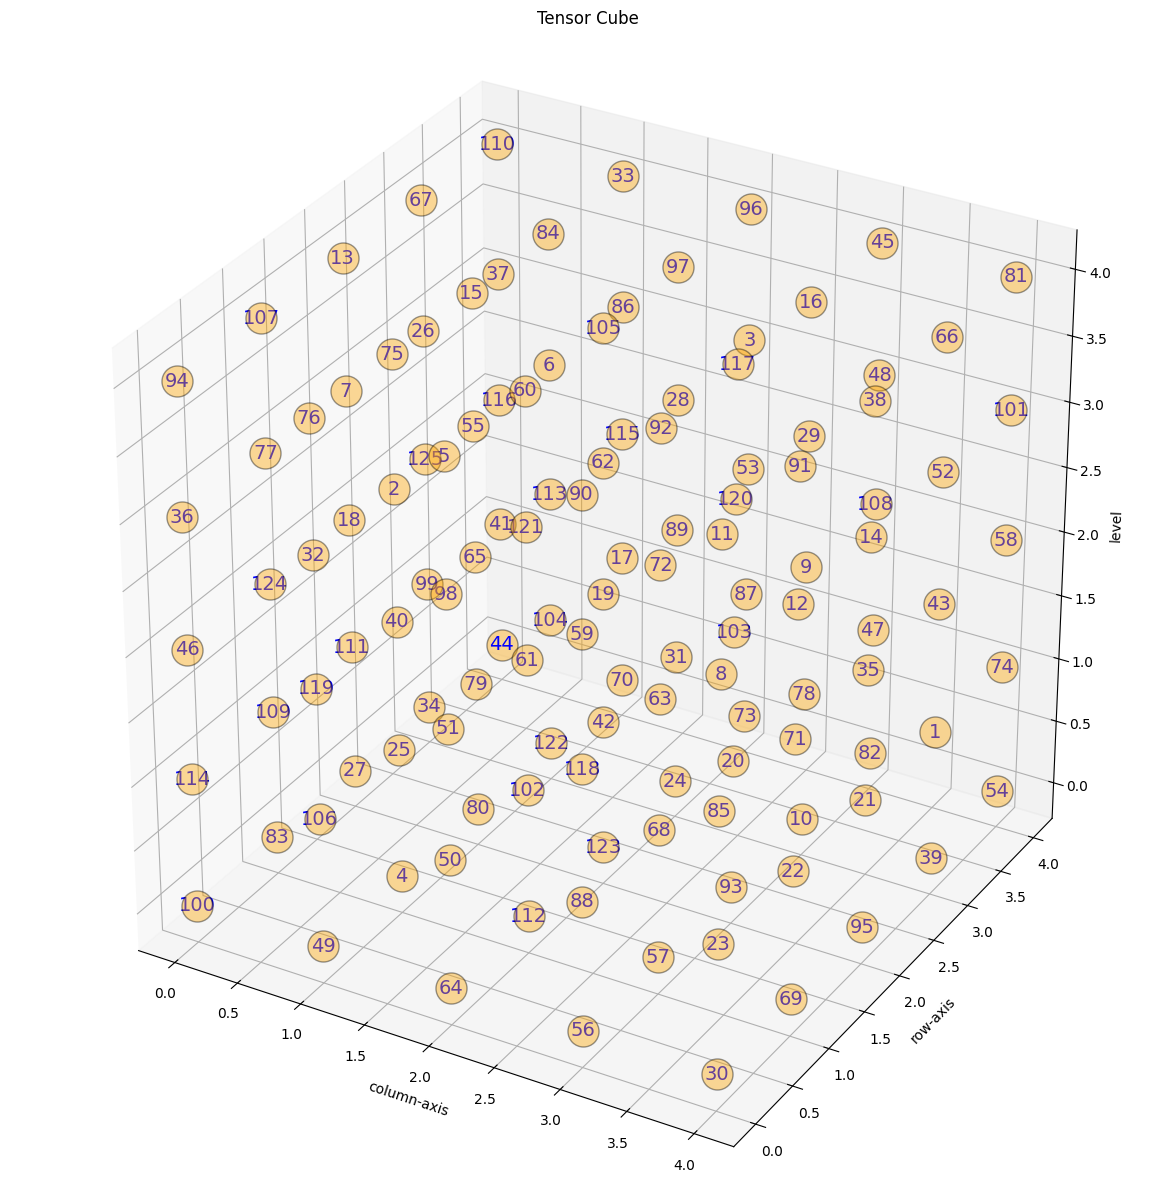

In [6]:
cube.plot_cube()

In [7]:
cube.print_tensor()

Level: 1

[100  83  27  34  44]
[ 49   4  80 122  70]
[ 64 112 123  24  73]
[56 57 93 10 82]
[30 69 95 39 54]

Level: 2

[114 109 111  99  41]
[106  25  79 104  17]
[ 50 102  42  31  87]
[88 68 20 78 47]
[23 22 21  1 74]

Level: 3

[ 46 124  18 125 116]
[119  40  65 113 115]
[51 61 19 89 53]
[118  63 103   9 108]
[85 71 35 43 58]

Level: 4

[36 77  7 26 37]
[32  2 55  6 86]
[ 98 121  62  28   3]
[ 59  72 120  29  48]
[  8  12  14  52 101]

Level: 5

[ 94 107  13  67 110]
[76 75 15 84 33]
[  5  60 105  97  96]
[ 90  92 117  16  45]
[11 91 38 66 81]



In [8]:
# cube.plot_per_level()

In [9]:
obj_func = cube.objective_function()
print(f"cube's objective function: {obj_func}")

cube's objective function: 1984238.0


## Local Seach Implementation

### Steepest Ascent Hill-Climbing

In [10]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 1278394.0


In [11]:
HC = Hill_climb(cube=cube)

Initial Value: 1984238.0

START!
WLELWELWE
Ifelse Statement
Step 1: Choosen Neighbor Value: 1684041.0; Best Value: 1984238.0
START!
WLELWELWE
Ifelse Statement
Step 2: Choosen Neighbor Value: 1560941.0; Best Value: 1684041.0
START!
WLELWELWE
Ifelse Statement
Step 3: Choosen Neighbor Value: 1530679.0; Best Value: 1560941.0
START!
WLELWELWE
Ifelse Statement


In [12]:
HC.results()

+------------------------ RESULTS -------------------------+

    final step: 4

  final Value: 1530679.000000

+-------------------------- END ---------------------------+


In [13]:
print(f"differences from ideal: {HC.best_value - obj_func_goal}")

differences from ideal: 252285.0


In [14]:
# HC.hist_plot()

### Simulated Annealing

In [15]:
print(f"ideal objective function {goal_cube.objective_function()}")

ideal objective function 1278394.0


In [16]:
SA = Simulated(cube=cube,tmax=10000,step_max=10000,cooling_schedule="quadratic",alpha=0.999)

Initial Energy: 1984238.0

Step:1, Energy: 1997878.0, Best Energy: 1984238.0,Temperature: 10000

Step:2, Energy: 1997366.0, Best Energy: 1984238.0,Temperature: 5002.501250625312

Step:3, Energy: 1994966.0, Best Energy: 1984238.0,Temperature: 2001.6012810248196

Step:4, Energy: 1994238.0, Best Energy: 1984238.0,Temperature: 1000.9008107296568

Step:5, Energy: 1993542.0, Best Energy: 1984238.0,Temperature: 588.7894488930758

Step:6, Energy: 1969062.0, Best Energy: 1984238.0,Temperature: 384.98556304138594

Step:7, Energy: 1971894.0, Best Energy: 1969062.0,Temperature: 270.53349204631536

Step:8, Energy: 1905751.0, Best Energy: 1969062.0,Temperature: 200.19619226842306

Step:9, Energy: 1901071.0, Best Energy: 1905751.0,Temperature: 153.99778243193296

Step:10, Energy: 1894791.0, Best Energy: 1901071.0,Temperature: 122.0718026343095

Step:11, Energy: 1896663.0, Best Energy: 1894791.0,Temperature: 99.10802775024777

Step:12, Energy: 1896325.0, Best Energy: 1894791.0,Temperature: 82.04858917

In [17]:
SA.results()

+------------------------ RESULTS -------------------------+

cooling sched.: quadratic multiplicative
  initial temp: 10000
    final temp: 0.00010010009909809711
    final step: 10001

  final energy: 1422790.000000

+-------------------------- END ---------------------------+


In [18]:
print(f"differences from ideal: {SA.best_energy - obj_func_goal}")

differences from ideal: 144396.0


In [19]:
SA.best_energy

1422790.0

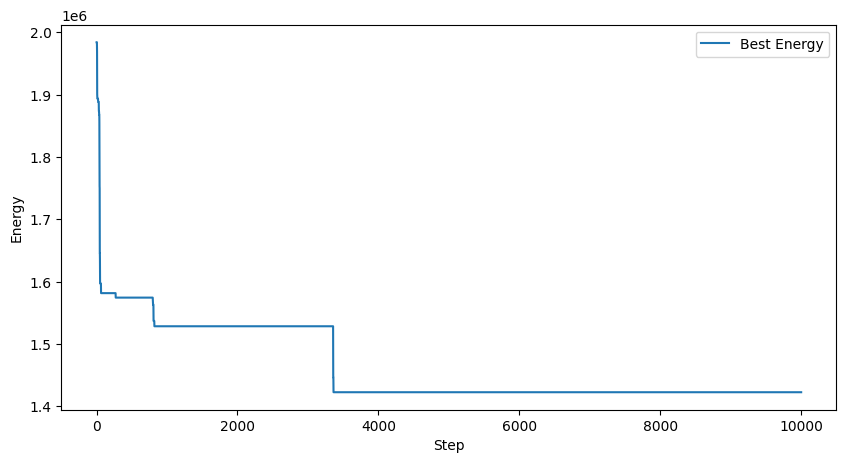

In [20]:
SA.hist_plot()

### Genetic Algorithm
